In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score , mean_squared_error 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_selection import mutual_info_regression
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
pip install xlrd

     |████████████████████████████████| 96 kB 2.6 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('../input/concrete-comprehensive-strength/Concrete_Data.xls')

### Exploratory data analysis

In [4]:
columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
        'Water  (component 4)(kg in a m^3 mixture)':'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate',
        'Age (day)':'age','Concrete compressive strength(MPa, megapascals) ':'concrete_strength'}
df.rename(columns=columns,inplace=True)

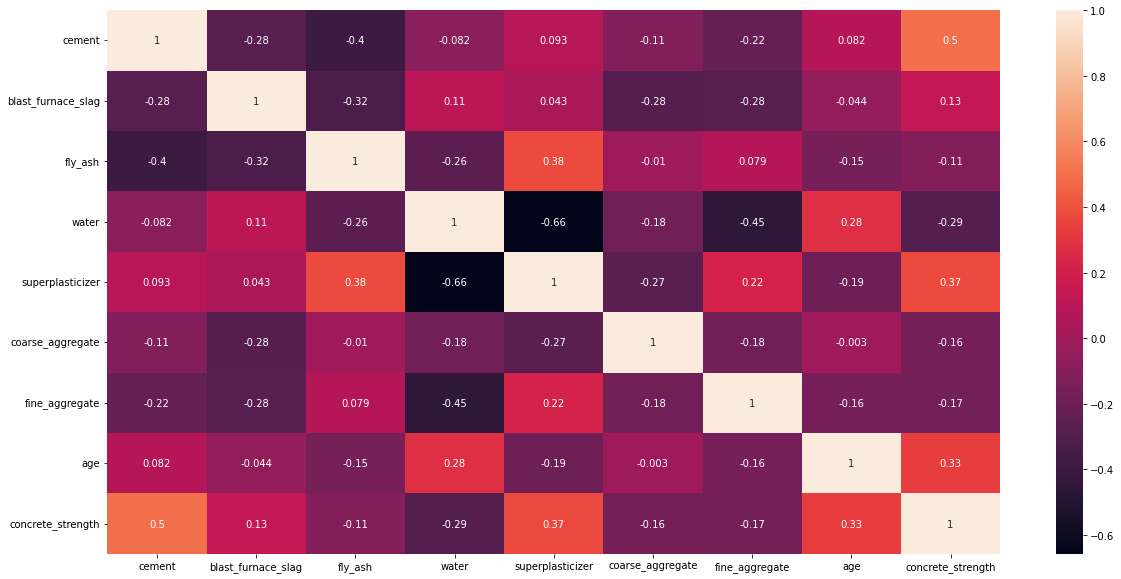

In [5]:
sns.heatmap(df .corr(), annot= True)
plt.show()

In [6]:
df.corr()['concrete_strength'].sort_values(ascending = False)

concrete_strength     1.000000
cement                0.497833
superplasticizer      0.366102
age                   0.328877
blast_furnace_slag    0.134824
fly_ash              -0.105753
coarse_aggregate     -0.164928
fine_aggregate       -0.167249
water                -0.289613
Name: concrete_strength, dtype: float64

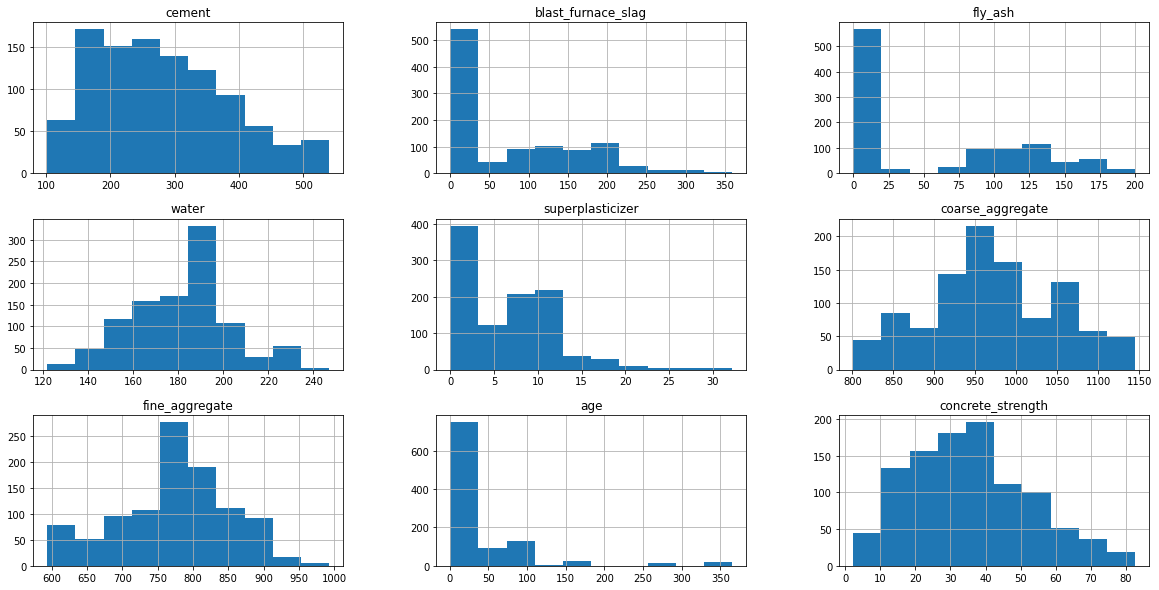

In [7]:
df.hist()
plt.show()

In [8]:
df['concrete_strength'].describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: concrete_strength, dtype: float64

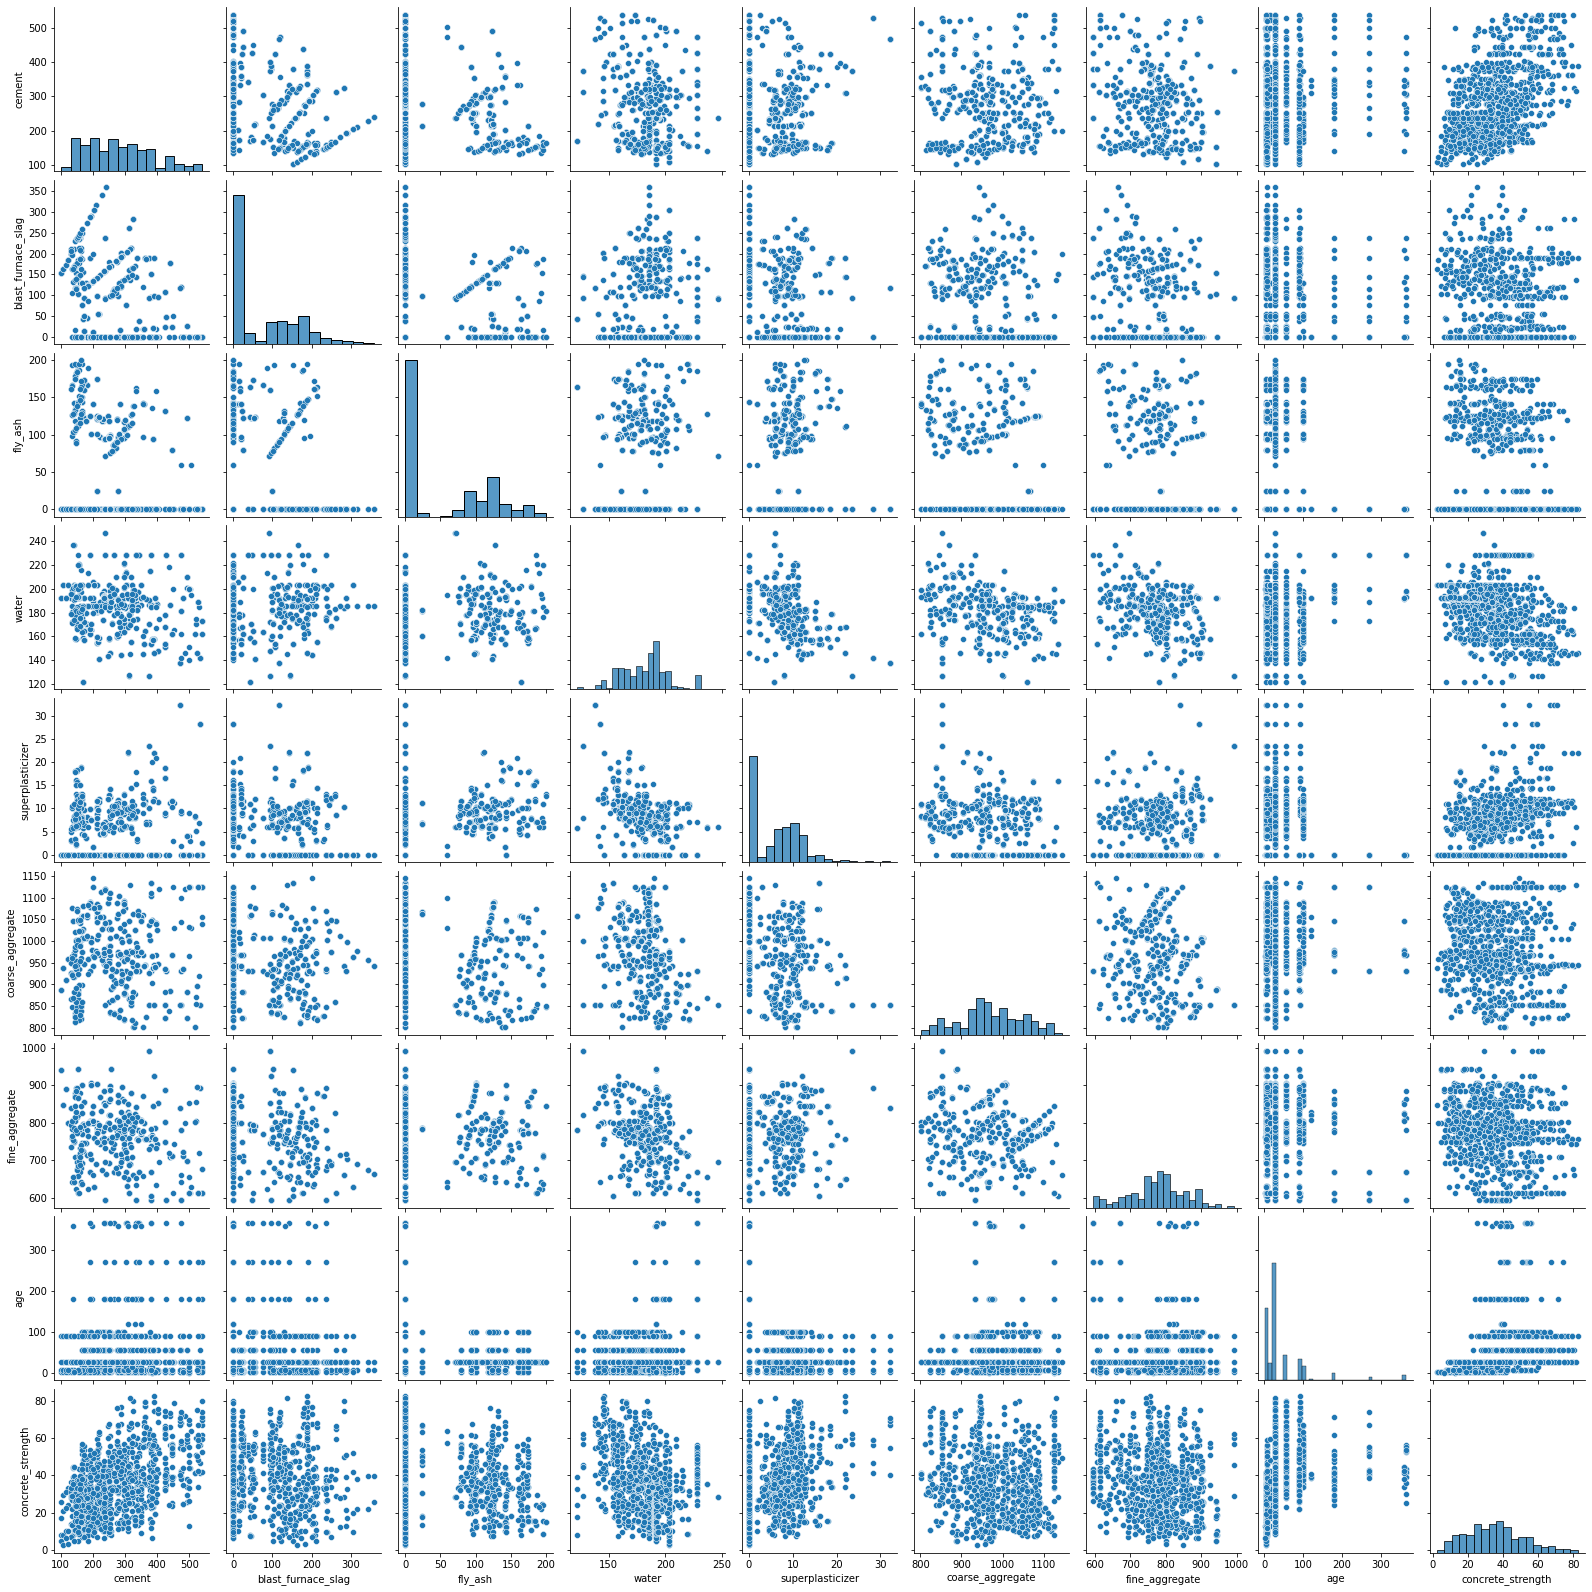

In [9]:
sns.pairplot(df)

In [10]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [11]:
def fncTest(x):
    x_train, x_test , y_train , y_test = train_test_split(x.drop('concrete_strength', axis=1) , x['concrete_strength'] , test_size=0.2, random_state= 42)
    ## Normalization
    scaler = StandardScaler()
    
    x_train = pd.DataFrame(scaler.fit_transform(x_train), columns= x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns= x_train.columns)
    ## Model
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pr = model.predict(x_test)
    return [r2_score(y_test ,y_pr ) , mean_squared_error(y_test ,y_pr)]

In [12]:
x_train, x_test , y_train , y_test = train_test_split(df.drop('concrete_strength', axis=1) , df['concrete_strength'] , test_size=0.2, random_state= 42)

In [13]:
lr1 = LinearRegression()

In [14]:
lr1.fit(x_train, y_train)

LinearRegression()

In [15]:
r2_score(y_test , lr1.predict(x_test))

0.627541605542902

### Feature Eng

<AxesSubplot:>

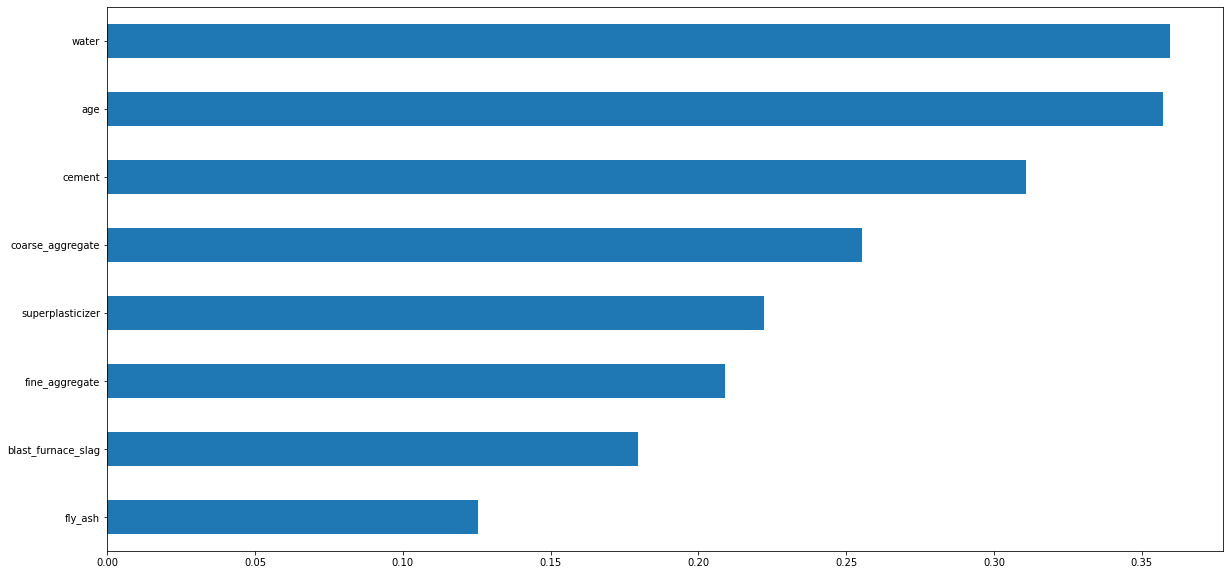

In [16]:
pd.Series(mutual_info_regression(df.drop('concrete_strength', axis=1) , df['concrete_strength']) , df.drop('concrete_strength', axis=1).columns).sort_values(ascending=True).plot.barh()

In [17]:
df['Total'] = df[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate']].sum(axis = 1)

##### Age

In [18]:
df['ageRoot'] = df['age']**(1/2)

<AxesSubplot:>

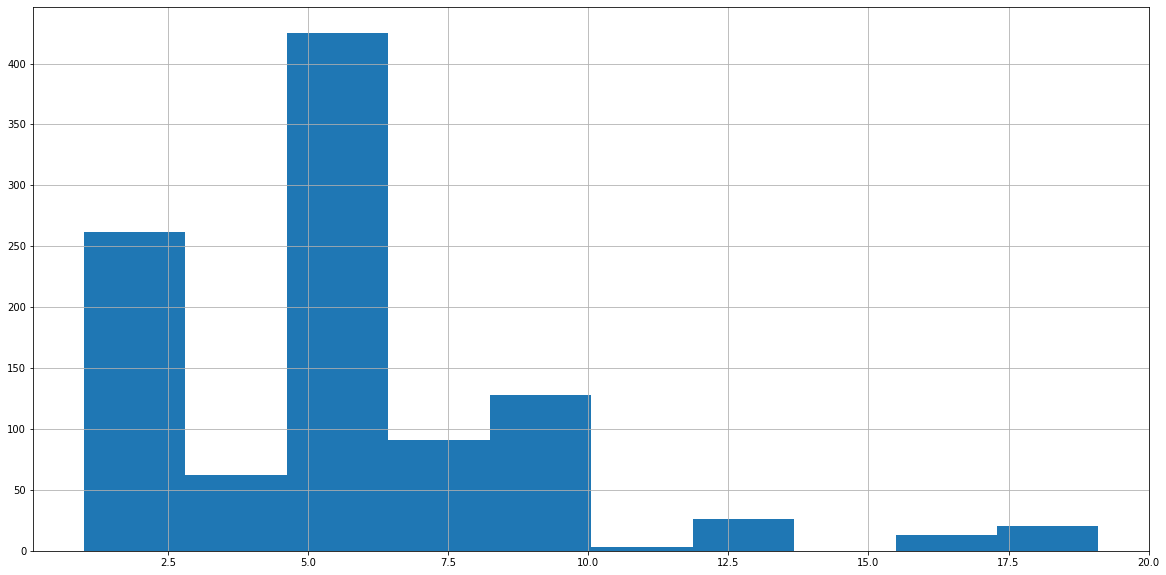

In [19]:
df['ageRoot'].hist()

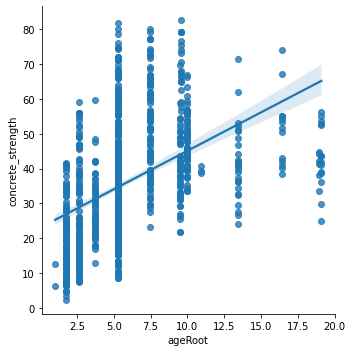

In [20]:
sns.lmplot(data = df , x ='ageRoot' , y='concrete_strength')

In [21]:
df.corr()['concrete_strength'].sort_values(ascending = False)

concrete_strength     1.000000
cement                0.497833
ageRoot               0.463654
Total                 0.407889
superplasticizer      0.366102
age                   0.328877
blast_furnace_slag    0.134824
fly_ash              -0.105753
coarse_aggregate     -0.164928
fine_aggregate       -0.167249
water                -0.289613
Name: concrete_strength, dtype: float64

In [22]:
fncTest(df)

[0.8161466331641242, 47.37553561597819]

##### Water

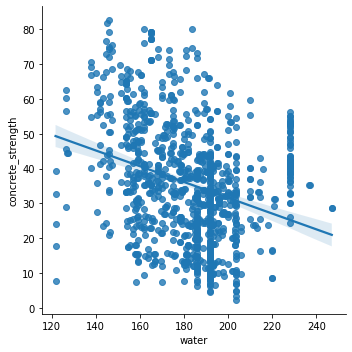

In [23]:
sns.lmplot(data = df , x ='water' , y='concrete_strength')

<AxesSubplot:>

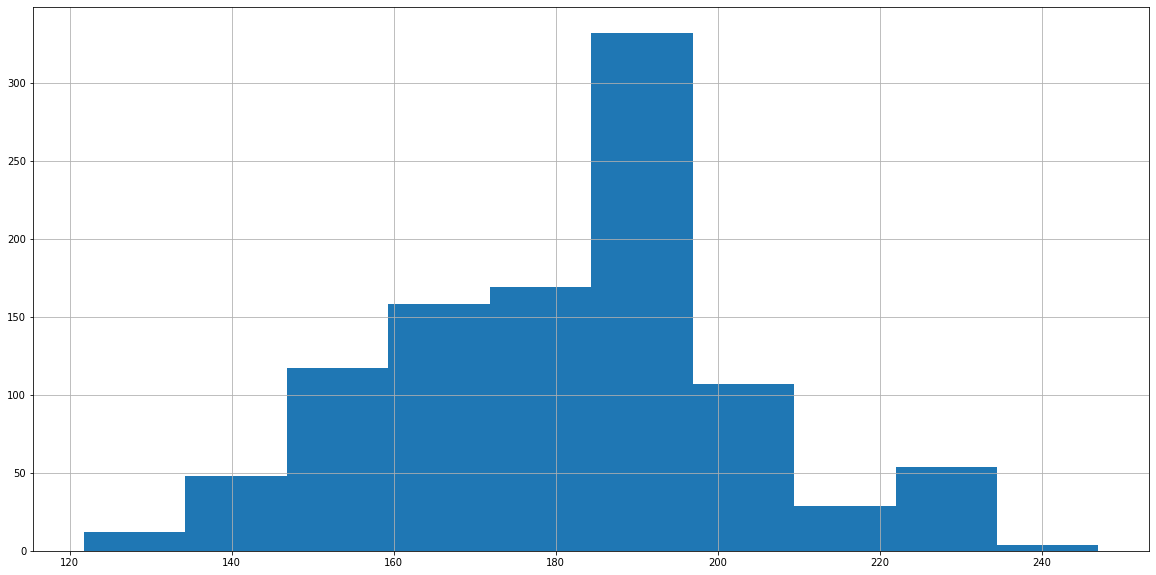

In [24]:
df['water'].hist()

In [25]:
df['snSuper']= df['superplasticizer'].map(lambda x : 1 if x >=1 else 0)

In [26]:
df['percWater'] = df['water'] / df['Total']

In [27]:
fncTest(df)


[0.8206577375648955, 46.213109325482684]

##### Cement

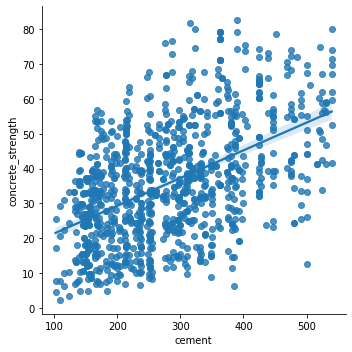

In [28]:
sns.lmplot(data = df , x ='cement' , y='concrete_strength')

In [29]:
df['cementRoot'] =  (df['blast_furnace_slag'] + df['fly_ash']+ df['coarse_aggregate']+ df['fine_aggregate']	) / df['Total']	
	

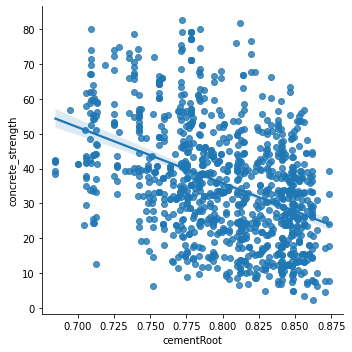

In [30]:
sns.lmplot(data = df , x ='cementRoot' , y='concrete_strength')

In [31]:
df.corr()['concrete_strength'].sort_values(ascending = False)

concrete_strength     1.000000
cement                0.497833
ageRoot               0.463654
Total                 0.407889
superplasticizer      0.366102
age                   0.328877
snSuper               0.287894
blast_furnace_slag    0.134824
fly_ash              -0.105753
coarse_aggregate     -0.164928
fine_aggregate       -0.167249
water                -0.289613
percWater            -0.314368
cementRoot           -0.417580
Name: concrete_strength, dtype: float64

In [32]:
fncTest(df)

[0.8232702125546728, 45.539923927499]

In [33]:
df.drop('concrete_strength' , axis = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Total,ageRoot,snSuper,percWater,cementRoot
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,2420.5,5.291503,1,0.066928,0.708944
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,2435.5,5.291503,1,0.066516,0.710737
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,2229.0,16.431677,0,0.102288,0.748542
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,2229.0,19.104973,0,0.102288,0.748542
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,2326.9,18.973666,0,0.082513,0.832137
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,2309.6,5.291503,1,0.077762,0.798710
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,2275.5,5.291503,1,0.086135,0.767699
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,2267.7,5.291503,1,0.084976,0.846849
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,2311.2,5.291503,1,0.075978,0.850294


### Modeling

In [34]:
x_train, x_test , y_train , y_test = train_test_split(df.drop('concrete_strength', axis=1) , df['concrete_strength'] , test_size=0.2, random_state= 42)
    ## Normalization
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns= x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=  x_train.columns)

In [35]:
import statsmodels.api as sm

In [36]:
sm.add_constant(x_train)

,const,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Total,ageRoot,snSuper,percWater,cementRoot
0,1.0,-1.160846,0.857395,0.982474,-0.314231,1.481991,-0.257457,-0.647505,-0.275673,-0.882251,-0.131874,0.764601,-0.111633,1.086459
1,1.0,1.308634,-0.602489,1.232625,-0.178148,0.388662,-1.926947,-0.273130,-0.275673,-0.122229,-0.131874,0.764601,-0.147881,-1.360982
2,1.0,-0.077122,-0.855581,1.066118,-1.047204,0.626779,1.017866,0.066649,-0.689313,0.798390,-1.173067,0.764601,-1.036293,0.345603
3,1.0,-0.291783,0.260327,0.357096,0.572657,0.308171,-1.761651,0.604117,-0.275673,-0.937104,-0.131874,0.764601,0.661876,0.043361
4,1.0,-1.065193,-0.369874,1.111458,-1.101168,0.782730,1.363716,0.297081,-0.689313,0.563130,-1.173067,0.764601,-1.041037,1.323827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,1.0,0.027370,1.455613,-0.831122,-1.740760,0.844775,0.394827,0.390365,-0.689313,1.628806,-1.173067,0.764601,-1.727759,0.458999
820,1.0,-0.339888,-0.855581,1.124435,-1.806455,0.977249,1.440006,0.355646,-0.507312,1.072503,-0.585227,0.764601,-1.698963,0.771043
821,1.0,-0.865513,-0.855581,1.125998,-0.712627,0.623426,1.340829,0.331058,0.915611,0.387143,1.245431,0.764601,-0.689447,1.034954
822,1.0,1.783176,0.511118,-0.831122,-0.032679,0.459091,-1.544223,0.116071,-0.275673,1.110748,-0.131874,0.764601,-0.264632,-1.671612


In [37]:
modelo = sm.OLS(list(y_train), sm.add_constant(x_train))

In [38]:
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     376.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.31e-321
Time:                        03:14:22   Log-Likelihood:                -2721.2
No. Observations:                 824   AIC:                             5468.
Df Residuals:                     811   BIC:                             5530.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.8577      0.231    155.285      0.000      35.404      36.311
cement                -8.5115      6.150     -1.384      0.167     -20.582       3.559
blast_furnace_slag    14.1199      2.235      6.319      0.000       9.734      18.506
fly_ash                7.0872      1.669      4.248      0.000       3.812      10.362
water                -53.7528      6.545     -8.213      0.000     -66.599     -40.907
superplasticizer      -4.2075      0.559     -7.529      0.000      -5.304      -3.111
coarse_aggregate       6.6373      1.974      3.362      0.001       2.762      10.512
fine_aggregate         7.0548      2.067      3.413      0.001       2.997      11.112
age                  -15.8187      0.749    -21.106      0.000     -17.290     -14.348
Total                 10.4881      1.499      6.999      0.000       7.547      13.430
ageRoot               23.4697      0.729     32.189      0.000      22.039      24.901
snSuper                4.6634      0.492      9.472      0.000       3.697       5.630
percWater             54.6761      8.064      6.780      0.000      38.846      70.506
cementRoot           -27.4748      8.475     -3.242      0.001     -44.111     -10.839
==============================================================================
Omnibus:                       17.524   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                           0.167   Prob(JB):                     9.88e-07
Kurtosis:                       3.833   Cond. No.                     2.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.95e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
modeloSK = LinearRegression()

In [40]:
modeloSK.fit(x_train, y_train)

LinearRegression()

In [41]:
## R2 with training dataset
modeloSK.score(x_train,y_train)

0.8478075534005408

In [42]:
## R2 with test dataset
modeloSK.score(x_test,y_test)

0.8232702125546728

In [43]:
scores = cross_val_score(modeloSK,x_train,y_train, cv = 6)

In [44]:
[scores.mean() , scores.std()]

[0.8390058412767916, 0.014145323896750831]